In [1]:
!pip install fosforml snowflake  snowflake-connector-python snowflake-snowpark-python snowflake-snowpark-python[pandas] seaborn matplotlib numpy pandas scikit-learn refractio refractml refractio[snowflake]

     |████████████████████████████████| 40kB 5.5MB/s  eta 0:00:01
     |████████████████████████████████| 2.5MB 29.0MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 109.9MB/s eta 0:00:01
     |████████████████████████████████| 296kB 104.8MB/s eta 0:00:01
     |████████████████████████████████| 8.3MB 73.7MB/s eta 0:00:01
     |████████████████████████████████| 13.4MB 92.7MB/s eta 0:00:01
     |████████████████████████████████| 51kB 18.4MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 99.9MB/s eta 0:00:01
     |████████████████████████████████| 665kB 101.8MB/s eta 0:00:01
     |████████████████████████████████| 153kB 115.6MB/s eta 0:00:01
     |████████████████████████████████| 112kB 124.4MB/s eta 0:00:01
     |████████████████████████████████| 1.6MB 97.0MB/s eta 0:00:01
     |████████████████████████████████| 4.4MB 95.7MB/s eta 0:00:01
     |████████████████████████████████| 327kB 73.8MB/s eta 0:00:01
     |████████████████████████████████| 4.6MB 98.2MB/s eta

In [2]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [3]:
table_name = 'SALARY_DATA'
sf_df = my_session.sql("select * from {}".format(table_name))
salaryDataset =  sf_df.to_pandas()
salaryDataset

,YEARSEXPERIENCE,SALARY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [12]:
X = salaryDataset[["YEARSEXPERIENCE"]]
y = salaryDataset[:,-1]

InvalidIndexError: (slice(None, None, None), slice(None, -1, None))

In [5]:
#from sklearn.preprocessing import train_test_split
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
#help(sklearn.model_selection.train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#help(model)

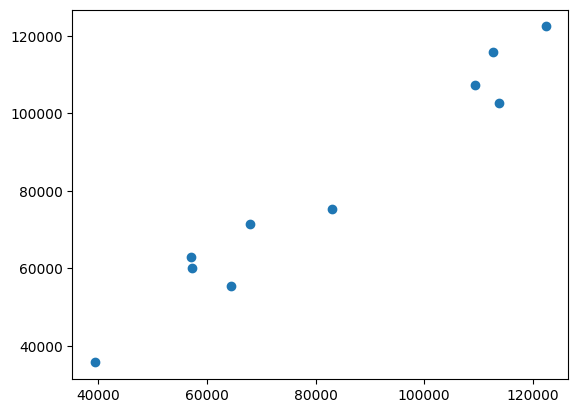

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.show()

In [8]:
from fosforml import register_model

In [11]:
X_train

array([[ 2.2],
       [ 5.1],
       [ 2.9],
       [ 4.1],
       [ 4. ],
       [ 7.9],
       [ 1.3],
       [ 1.5],
       [ 9. ],
       [ 2. ],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [10.5],
       [ 6.8],
       [ 3.2],
       [ 3.9],
       [ 4.5],
       [ 6. ],
       [ 3. ]])

In [10]:
register_model(
  model_obj=model,
  session=my_session,
  x_train=X_train,
  y_train=y_train,
  x_test=X_test,
  y_test=y_test,
  y_pred=y_pred,
  source="Notebook",
  dataset_name="SALARY_DATA",
  dataset_source="Snowflake",
  name="Salary_Prediction",
  description="This model is to predict the salary based on experinece",
  flavour="sklearn",
  model_type="regression",
  conda_dependencies=["scikit-learn==1.3.2"]
)

"error, invalid inputs : please provide 'x_train' as a pandas dataFrame"

In [61]:
import pickle

serialized_model = pickle.dumps(model)

In [70]:
from snowflake.ml.registry import Registry

registry = Registry(session=session, database_name=current_db, schema_name=current_schema)
registry.log_model(
    model_name="Salary_Prediction_Model",
    model=model,
    version_name = "V1",
    comment="A simple linear regression model",
    sample_input_data = [[5.2]]
)
#help(Registry.log_model)

c:\Users\chauh\AppData\Local\Programs\Python\Python38\lib\contextlib.py:113: UserWarning: `relax_version` is not set and therefore defaulted to True. Dependency version constraints relaxed from ==x.y.z to >=x.y, <(x+1). To use specific dependency versions for compatibility, reproducibility, etc., set `options={'relax_version': False}` when logging the model.
  return next(self.gen)


In [73]:
# Install snowflake-ml-python
from snowflake.ml.registry import registry

reg = registry.Registry(session=session, database_name='FDC', schema_name='INSIGHT_DESIGNER')
mv = reg.get_model('SALARY_PREDICTION_MODEL').version('V1')
mv.run([[10.2]], function_name='PREDICT')

,output_feature_0
0,121469.930824
